# Quick Sort

Also uses divide and conquer, picks a 'pivot' element and partitions other elements into two sub-arrays according to whether they are less than or greater than the pivot.

Steps:
1. Choose a pivot element from the array
2. Partition array around pivot - elements less than pivot go to left, greater go to right
3. Recursively apply steps 1-2 to subarrays on left and right of pivot
4. Base case is when subarray has 1 or 0 elements
5. When partitioning:
   - Take rightmost element as pivot
   - Keep track of elements smaller than pivot
   - Traverse array and swap elements smaller than pivot to left side
   - Place pivot in final position between left and right partitions
   - Return pivot position

In [9]:
def swap(arr: list[int], i: int, j: int):
    arr[i], arr[j] = arr[j], arr[i]

def partition(arr: list[int]) -> tuple[list[int], int, list[int]]:
    """return left array, partition value, right array"""
    if len(arr) == 1:
        return [], arr[0], []
    
    # Sort on pivot
    pivot_index = len(arr) - 1
    index = 0

    while index < pivot_index:
        # Compare index to pivot
        if arr[index] > arr[pivot_index]:
            # Move it and decrement pivot
            swap(arr, index, pivot_index - 1)
            swap(arr, pivot_index - 1, pivot_index)
            pivot_index -= 1
        
        # If its already less than pivot just leave it and go to next one
        else:
            # Update index
            index += 1

    # Quicksort the left and right sides
    left = arr[:pivot_index]
    right = arr[pivot_index + 1 :]

    return left, arr[pivot_index], right

def quick_sort(arr: list[int]) -> list[int]:
    # Handle base case of 1 element left
    if len(arr) <= 1:
        return arr
    
    sorted = []
    stack = []

    # Initial partition on input array and push results to stack
    l, p, r = partition(arr)
    for i in [l, p, r]:
        if isinstance(i, list) and len(i) == 0:
            continue

        # Push output onto stack.
        stack.append(i)

    # Then start popping,  Discard empty arrays. When you find a non-empty array, partition it and put the results back on the stack
    while len(stack) > 0:
        v = stack.pop()

        # ints are pivots and go to the sorted array at the front
        if type(v) == int:
            sorted.insert(0, v)
            continue

        # Same for 1 length arrays
        if isinstance(v, list) and len(v) == 1:
            sorted.insert(0, v[0])
            continue

        # And filter out any empty arrays
        if isinstance(v, list) and len(v) == 0:
            continue

        # Else partition v and put the output back on the stack
        l, p, r = partition(v)

        for i in [l, p, r]:
            if isinstance(i, list) and len(i) == 0:
                continue

            stack.append(i)

            

    # Stack is now empty and the sorted list contains all our elements in sorted value

    assert len(stack) == 0
    assert len(sorted) == len(arr)

    return sorted

func = quick_sort
func_name = "Quick Sort"

func([10, 1, 5, 9, 3, 8, 2, 1, 4, 7, 6, 9])

# new pivot: 9
# [10, 1, 5, 9, 3, 8, 2, 1, 4, 7, 6, 9]
# [6, 1, 5, 9, 3, 8, 2, 1, 4, 7, 9, 10]
# done and split
# left: [6, 1, 5, 9, 3, 8, 2, 1, 4, 7], pivot: 9, right: [10]
# new left pivot: 7
# [6, 1, 5, 4, 3, 8, 2, 1, 7, 9]
# [6, 1, 5, 4, 3, 1, 2, 7, 8, 9]
# done and split left
# left: [6, 1, 5, 4, 3, 1, 2], pivot: 7, right: [8, 9]
# new left pivot: 2
# [6, 1, 5, 4, 3, 1, 2]
# [1, 1, 5, 4, 3, 2, 6]
# [1, 1, 3, 4, 2, 5, 6]
# [1, 1, 4, 2, 3, 5, 6]
# [1, 1, 2, 4, 3, 5, 6]
# done and split left
# left: [1, 1], pivot: 2, right: [4, 3, 5, 6]



[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10]

Test case 1: Already sorted array
Original array: [   0    1    2 ... 9997 9998 9999]
Sorted array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,

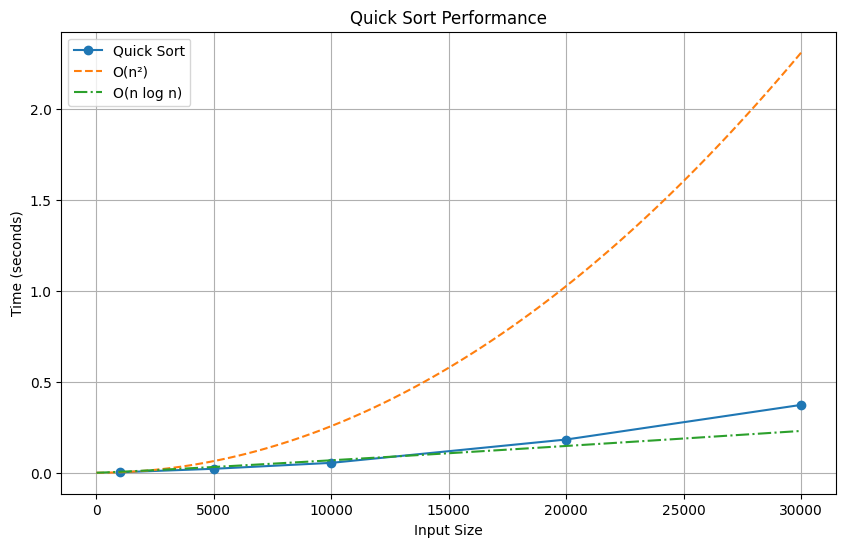

In [10]:
import time
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def test_sort(sort_func: Callable):
    # Test case 1: Already sorted array
    arr1 = np.arange(10000)
    print("Test case 1: Already sorted array")
    print("Original array:", arr1)
    start_time = time.time()
    sorted_arr1 = sort_func(arr1.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr1)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()
    
    # Test case 2: Reverse sorted array
    arr2 = np.arange(10000, 0, -1)
    print("Test case 2: Reverse sorted array")
    print("Original array:", arr2)
    start_time = time.time()
    sorted_arr2 = sort_func(arr2.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr2)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()
    
    # Test case 3: Random array
    arr3 = np.random.randint(-100000, 1000000, size=10000)
    print("Test case 3: Random array")
    print("Original array:", arr3)
    start_time = time.time()
    sorted_arr3 = sort_func(arr3.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr3)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()
    
    # Test case 4: Array with duplicates
    arr4 = np.random.randint(-100, 100, size=10000)
    print("Test case 4: Array with duplicates")
    print("Original array:", arr4)
    start_time = time.time()
    sorted_arr4 = sort_func(arr4.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr4)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()

def measure_performance(sort_func: Callable, sort_name: str):
    sizes = [1000, 5000, 10000, 20000, 30000]
    times = []
    
    for size in sizes:
        # Generate random array
        arr = np.random.randint(-100000, 1000000, size=size)
        
        # Measure time for bubble sort
        start_time = time.time()
        sort_func(arr.copy().tolist())
        end_time = time.time()
        
        times.append(end_time - start_time)
        print(f"Size {size}: {times[-1]:.6f} seconds")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, 'o-', label=sort_name)
    
    # Plot O(n²) complexity for comparison
    # Create a separate array with more points for smoother curve
    x_smooth = np.linspace(1, max(sizes), 100)
    y_smooth = times[0] * (x_smooth/sizes[0])**2
    plt.plot(x_smooth, y_smooth, '--', label='O(n²)')

    # Plot O(n log n) complexity for comparison
    y_nlogn = 2* times[0] * (x_smooth/sizes[0]) * np.log(x_smooth)/np.log(sizes[0])
    plt.plot(x_smooth, y_nlogn, '-.', label='O(n log n)')
    
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title(f'{sort_name} Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the tests
test_sort(func)
print("Performance measurement:")
measure_performance(func, func_name)